Interactive parameter exploration for SIR model

https://github.com/bloomberg/bqplot

https://ipywidgets.readthedocs.io/

In [1]:
import math
import bqplot
import ipywidgets as widgets

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# Fixed parameters
N = 200     # Number of participants
Tmax = 120  # total duration of the simulaion

# Tunable parameters
Tinf = 10   # infectious time
I0 = 1      # number of initial cases
Itot = 150  # total number of cases
cr = 0.005  # per capita contact rate, 
            # cr x N is the number of contacts per unit of time an infectious individual make

S0 = N - I0
R0 = N - I0 - S0
Send = N - Itot

z = Itot/math.log(S0/Send)
print("gamma/beta =", z)
print("R0 =", S0/z)

Imax = N - z + z * math.log(z) - z * math.log(S0)
print("Imax =", Imax)

gamma = 1/Tinf
beta = gamma/z
print("beta =", beta)

p = beta/cr  # probability that a contact with a susceptible individual results in transmission
print("Probability of infection =", p)

gamma/beta = 108.5947834138678
R0 = 1.8325005469331526
Imax = 25.631370353578745
beta = 0.0009208545461975642
Probability of infection = 0.18417090923951285


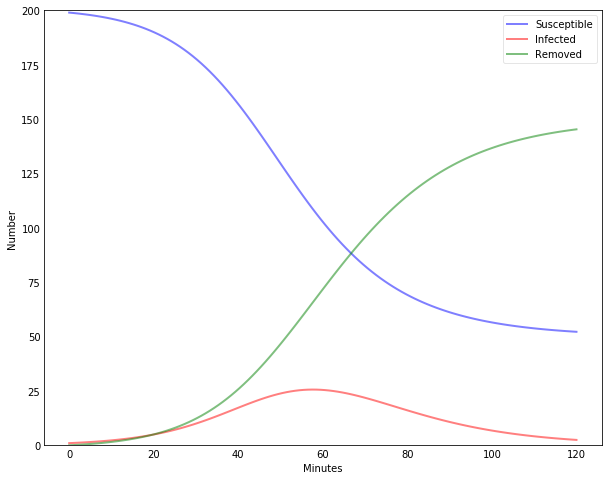

In [3]:
# https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/
# S'(t) = −beta * I * S
# I'(t) = beta * I S − gamma * I
# R'(t) = gamma * I
# S(0) = S0
# I(0) = I0
# R(0) = N - S0 - I0 = 0

# A grid of time points (in minutes)
t = np.linspace(0, Tmax, Tmax)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Removed')
ax.set_xlabel('Minutes')
ax.set_ylabel('Number')
ax.set_ylim(0, N)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
# for spine in ('top', 'right', 'bottom', 'left'):
#     ax.spines[spine].set_visible(False)
plt.show()

In [4]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [5]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

# Using Tinf as parameter
def funp(Tinf=Tmax/10, I0=1, Itot=0.8*N, cr=1/N):
    S0 = N - I0
    R0 = N - I0 - S0
    Send = N - Itot

    z = Itot/math.log(S0/Send)
    BRN = S0/z
    print("gamma/beta =", z)
    print("Basic reproductive number =", BRN)

    Imax = N - z + z * math.log(z) - z * math.log(S0)
    print("Imax = ", Imax)

    gamma = 1/Tinf
    beta = gamma/z
    print("beta =", beta)

    p = beta/cr  # probability that a contact with a susceptible individual results in transmission
    print("Probability of infection =", p)

    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Removed')
    ax.set_xlabel('Minutes')
    ax.set_ylabel('Number')
    ax.set_ylim(0, N)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    plt.show()

interactive_plot = interactive(funp, Tinf=(1.0, Tmax/2), I0=(1, 10), Itot=(0, N-1), cr=(0.1/N, 10/N, 0.1/N))
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

interactive(children=(FloatSlider(value=12.0, description='Tinf', max=60.0, min=1.0), IntSlider(value=1, descr…